In [1]:
import lighthouse as lh

import numpy as np
import matplotlib.pyplot as plt 

import torch 

In [2]:
# lh.isochrone.get_isochrones.get_mist_isochrones()

In [3]:
import read_mist_models

ref_iso_solar = read_mist_models.ISO('/Users/alexa/Light-House/lighthouse/data/MIST/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso')
ref_iso_mp    = read_mist_models.ISO('/Users/alexa/Light-House/lighthouse/data/MIST/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.0_basic.iso')

I = lh.isochrone.MIST()


Reading in: /Users/alexa/Light-House/lighthouse/data/MIST/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_basic.iso
Reading in: /Users/alexa/Light-House/lighthouse/data/MIST/MIST_v1.2_vvcrit0.0_basic_isos/MIST_v1.2_feh_m0.50_afe_p0.0_vvcrit0.0_basic.iso


1471
1471
1468


/var/folders/n8/zpctb3_d3ls5r091rzymq5t00000gn/T/ipykernel_49095/3216333459.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  iso = I.get_isochrone(torch.tensor(metallicity, dtype = torch.float64),
/var/folders/n8/zpctb3_d3ls5r091rzymq5t00000gn/T/ipykernel_49095/3216333459.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  iso = I.get_isochrone(torch.tensor(metallicity, dtype = torch.float64),


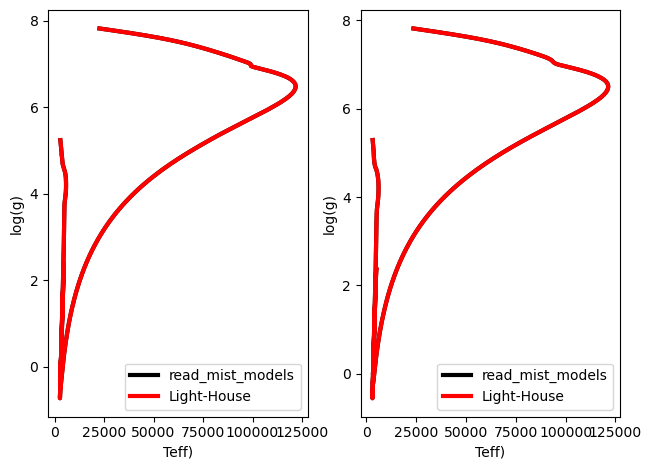

In [4]:


ax1 = plt.subplot(121)
ax2 = plt.subplot(122)




age_ind = ref_iso_solar.age_index(10.) #returns the index for the desired age
Teff = 10**ref_iso_solar.isos[age_ind]['log_Teff']
log_g = ref_iso_solar.isos[age_ind]['log_g']
ax1.plot(Teff, log_g, color='k', lw=3, label='read_mist_models') 

print(len(log_g))

mask = ((I.metallicities == 0.0))
for metallicity in I.metallicities[mask]:
    iso = I.get_isochrone(torch.tensor(metallicity, dtype = torch.float64), 
                          torch.tensor(10.,dtype = torch.float64))  
    ax1.plot(iso["Teff"], iso["log_g"], label='Light-House', color='r', lw=3)

print(len(iso["log_g"]))

ax1.legend()
ax1.set_xlabel('Teff)')
ax1.set_ylabel('log(g)')



age_ind = ref_iso_mp.age_index(10.) #returns the index for the desired age
Teff = 10**ref_iso_mp.isos[age_ind]['log_Teff']
log_g = ref_iso_mp.isos[age_ind]['log_g']
ax2.plot(Teff, log_g, color='k', lw=3, label='read_mist_models') 

print(len(log_g))


mask = ((I.metallicities == -0.5))
for metallicity in I.metallicities[mask]:
    iso = I.get_isochrone(torch.tensor(metallicity, dtype = torch.float64), 
                          torch.tensor(10.,dtype = torch.float64))  
    ax2.plot(iso["Teff"], iso["log_g"], label='Light-House', color='r', lw=3)

ax2.legend()
ax2.set_xlabel('Teff)')
ax2.set_ylabel('log(g)')

plt.tight_layout()

In [5]:
print('ages: ', [round(x,2) for x in ref_iso_solar.ages])

print(ref_iso_solar.num_ages)
print(ref_iso_mp.num_ages)

ages:  [5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3]
107
107


In [6]:
print('ages: ', [round(x.item(),2) for x in I.ages])

print(len(I.ages))


print('FeH: ', [round(x.item(),2) for x in I.metallicities])


ages:  [5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3]
107
FeH:  [-2.0, -1.75, -0.5, -3.5, 0.0, -0.25, -1.0, -4.0, -1.25, -2.5, 0.25, -0.75, 0.5, -3.0, -1.5]


In [7]:
def test_isochrone_selection(ref_feh, I):
    metallicity_index = torch.clamp(torch.sum(I.metallicities < ref_feh) - 1, 0)
    print(I.metallicities[metallicity_index])

    metallicity_index_try2 = (I.metallicities  == ref_feh).nonzero(as_tuple=False).squeeze()
    print(I.metallicities[metallicity_index_try2])

testing = test_isochrone_selection(torch.tensor(0.0), I)
testing = test_isochrone_selection(torch.tensor(-0.5), I)


tensor(-0.7500, dtype=torch.float64)
tensor(0., dtype=torch.float64)
tensor(-2.5000, dtype=torch.float64)
tensor(-0.5000, dtype=torch.float64)


In [8]:
def test_isochrone_selection(ref_age, I):
    age_index = torch.clamp(torch.sum(I.ages < ref_age) - 1, 0)
    print(I.ages[age_index])

    age_index_try2 = (I.ages  == ref_age).nonzero(as_tuple=False).squeeze()
    print(I.ages[age_index_try2])

testing = test_isochrone_selection(torch.tensor(10.0), I)
testing = test_isochrone_selection(torch.tensor(5.0), I)

testing = test_isochrone_selection(torch.tensor(10.1), I)
testing = test_isochrone_selection(torch.tensor(10.2), I)
testing = test_isochrone_selection(torch.tensor(10.3), I)



tensor(9.9500, dtype=torch.float64)
tensor(10., dtype=torch.float64)
tensor(5., dtype=torch.float64)
tensor(5., dtype=torch.float64)
tensor(10.1000, dtype=torch.float64)
tensor([], dtype=torch.float64)
tensor(10.1500, dtype=torch.float64)
tensor([], dtype=torch.float64)
tensor(10.3000, dtype=torch.float64)
tensor([], dtype=torch.float64)


In [11]:
def all_together_now(ref_feh, ref_age, I):
    metallicity_index = (I.metallicities  == ref_feh).nonzero(as_tuple=False).squeeze()
    # print(I.metallicities[metallicity_index])
    
    age_index = (I.ages  == ref_age).nonzero(as_tuple=False).squeeze()
    # print(I.ages[age_index])

    isochrone = I.isochrone_grid[metallicity_index, age_index].clone()
    isochrone = isochrone[:,isochrone[0] > -999]

    return dict((p, isochrone[i]) for i, p in enumerate(I.param_order))

testing = all_together_now(torch.tensor(0.0), torch.tensor(10.0), I)


1562
1562
1562
1558
1558


/var/folders/n8/zpctb3_d3ls5r091rzymq5t00000gn/T/ipykernel_49095/2171077705.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  iso = I.get_isochrone(torch.tensor(metallicity, dtype = torch.float64),
/var/folders/n8/zpctb3_d3ls5r091rzymq5t00000gn/T/ipykernel_49095/2171077705.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  iso = I.get_isochrone(torch.tensor(metallicity, dtype = torch.float64),


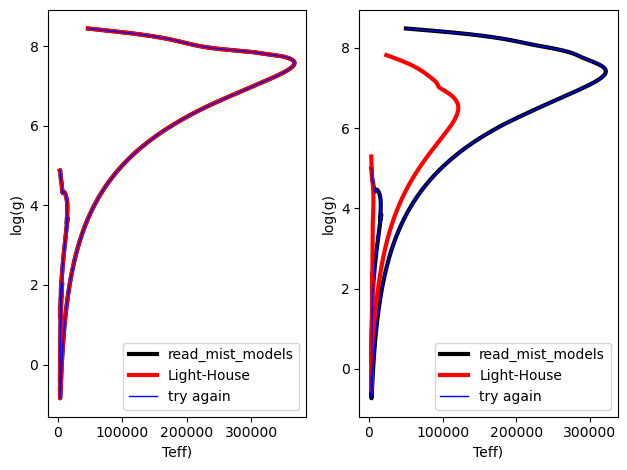

In [12]:

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


ssp_age = 8.



age_ind = ref_iso_solar.age_index(ssp_age) #returns the index for the desired age
Teff = 10**ref_iso_solar.isos[age_ind]['log_Teff']
log_g = ref_iso_solar.isos[age_ind]['log_g']
ax1.plot(Teff, log_g, color='k', lw=3, label='read_mist_models') 

print(len(log_g))

mask = ((I.metallicities == 0.0))
for metallicity in I.metallicities[mask]:
    iso = I.get_isochrone(torch.tensor(metallicity, dtype = torch.float64), 
                          torch.tensor(ssp_age, dtype = torch.float64))  
    ax1.plot(iso["Teff"], iso["log_g"], label='Light-House', color='r', lw=3)

print(len(iso["log_g"]))


testing = all_together_now(torch.tensor(0.0), torch.tensor(ssp_age), I)
ax1.plot(testing["Teff"], testing["log_g"], label='try again', color='b', lw=1)

print(len(testing["log_g"]))

ax1.legend()
ax1.set_xlabel('Teff)')
ax1.set_ylabel('log(g)')



age_ind = ref_iso_mp.age_index(ssp_age) #returns the index for the desired age
Teff = 10**ref_iso_mp.isos[age_ind]['log_Teff']
log_g = ref_iso_mp.isos[age_ind]['log_g']
ax2.plot(Teff, log_g, color='k', lw=3, label='read_mist_models') 

print(len(log_g))


mask = ((I.metallicities == -0.5))
for metallicity in I.metallicities[mask]:
    iso = I.get_isochrone(torch.tensor(metallicity, dtype = torch.float64), 
                          torch.tensor(10.,dtype = torch.float64))  
    ax2.plot(iso["Teff"], iso["log_g"], label='Light-House', color='r', lw=3)


testing = all_together_now(torch.tensor(-0.5), torch.tensor(ssp_age), I)
ax2.plot(testing["Teff"], testing["log_g"], label='try again', color='b', lw=1)

print(len(testing["log_g"]))

ax2.legend()
ax2.set_xlabel('Teff)')
ax2.set_ylabel('log(g)')

plt.tight_layout()